<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Fundamentals of Data Analysis - Tasks
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Fundamentals of Data Analysis <br>
Lecturer: Ian McLoughlin

A notebook which contains the work on the tasks for the above module (Autumn 2023)

Student: Eilis Donohue (G00006088)

Software Used: 
 - Python v3.10 and higher
 - Jupyter Notebook 6.4.12   

***

## Table of Contents <a id="toc"></a> 
- [Task 1 - Collatz Conjecture](#Task1)
- [Task 2 - Penguins](#Task2)
- [Task 3 - Penguins 2](#Task3)
- [Task 4 - Coin Flip](#Task4)
- [Task 5 - Penguins - Plots](#Task5)


***

## Task 1 - Collatz Conjecture <a id="Task1"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>
The Collatz conjection is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1,4,2,1,4,2, ...
$$
f(x>0) =
\begin{cases}
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{ otherwise}
\end{cases}
$$

The task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

Resources used:
- https://stackoverflow.com/questions/39734485/python-combining-two-lists-and-removing-duplicates-in-a-functional-programming
- https://stackoverflow.com/questions/59925384/python-remove-elements-that-are-greater-than-a-threshold-from-a-list

It appears that running all the integers (brute force method below) without checking if a number has already been hit on in a previous loop is faster up to at least 1e6 integers (46.7s). 

There may be further scope for optimisation by stopping a series by checking each output of the collatz function against the already proven set. 

In [41]:
# import packages
# import time to time the execution
import time

# The function to do the collatz execution
def collatz_step(x):
  # check if even - if even divide by 2
  if x % 2 == 0:
    return x / 2 
  else:
    return (x * 3) + 1 

In [42]:
# Brute force - run every integer completely 
# Define some variables
# Define the number of positive integers we want to check satisfies the Collatz conjecture
number_of_integers = 10000

# Define empty set of proven integers
proved_set = set()
loop_counter = 0
st = time.time()

# Loop backwards from the required number of integers
for x in range(1, number_of_integers+1, 1):
  # check if the number has already been proven
    loop_counter = loop_counter + 1
    number_set = [x]
    while x != 1:
      # call Collatz function
      x = collatz_step(x)
      number_set.append(x)
    et = time.time()
print(f"Collatz conjecture proven for first {number_of_integers} integers, completed in {loop_counter} loops in {np.round(et-st, 1)} seconds")

Collatz conjecture proven for first 10000 integers, completed in 10000 loops in 0.3 seconds


In [20]:
# This is a method which checks if the number has already been proven.
# import time to time the execution
import time
import math
import numpy as np
# Define some variables
# Define the number of positive integers we want to check satisfies the Collatz conjecture
number_of_integers = 10000

# Define empty set of proven integers
proved_set = set()
loop_counter = 0
st = time.time()
# Loop backwards from the required number of integers
for x in reversed(range(1, number_of_integers+1, 1)):
  # check if the number has already been proven
  if x not in proved_set:
    # Define an empty list to store the collatz sequence for each number and a loop counter to check how many collatz sequences are actually calculated
    loop_counter = loop_counter + 1
    number_set = set() 
    while x != 1:
      # call Collatz function
      x = collatz_step(x)
      # append each value to the collatz sequence set
      # Could actually just only add numbers to the set if they're below number_of_integers to avoid having to remove later
      number_set.add(x)
  # remove the numbers bigger than number_of_integers from the set so that we aren't storing numbers greater than this
  #number_set = {val for val in number_set if val<=number_of_integers}
  # Union the sets to remove duplicates and get new proven set of numbers
  proved_set = proved_set | number_set
  et = time.time()
print(f"Collatz conjecture proven for first {number_of_integers} integers, completed in {loop_counter} loops in {et-st} seconds")



Collatz conjecture proven for first 10000 integers, completed in 2725 loops in 3.9060513973236084 seconds


---
## Task 2 - Penguins <a id="Task2"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>
Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

2 mwaskom/seaborn-data: Data repository
for seaborn examples. Aug. 30, 2023. url:
https://github.com/mwaskom/
seaborn - data / blob / master /
penguins.csv (visited on 08/30/2023).

Resources:
- Visualising the penguins dataset using seaborn: https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn

Python datatypes:
HOLD

In [22]:
# Use pandas to read in the penguins csv file stored in /data and get a preview of first 10 rows
import pandas as pd

penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.head(10))

# Find the shape of the dataframe
print(f'\nDataframe shape is (rows, columns): {penguins_df.shape}\n')

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       36

In [23]:
# Print the pandas assigned type for each variable in the dataframe
print(penguins_df.info())
#print(penguins_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


Float types:
From the above, there are 4 variables which are identified as floating point numbers with at least one decimal place (all appearing to be measurements). 
**float** type would be used in Python to model these variables. Float type will also handle any "nans".

String types:
There are 3 variables with textual data ('species', 'island' and 'sex') which are textual descriptors of the variable.
The obvious Python datatypes for these variables would be string type **(str)** 

Identifying the unique data for each of the object/textual variable types in the dataframe can be done as follows using the .unique() method.

In [24]:
print(penguins_df["species"].unique())
print(penguins_df["island"].unique())
print(penguins_df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan]


- Getting a summary description of the textual variables below may be performed using .describe() method. 
- From the unique description and the summary description and knowing there are 344 data entries in the dataset (see above), it is clear that the species and island data entries are one of 3 possibilities. 
- It is seen also there are 11 nan values for the sex variable as the 'count' can be subtracted from the known total number of values.

In [25]:
print(penguins_df["species"].describe())
print(penguins_df["island"].describe())
print(penguins_df["sex"].describe())


count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object
count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object
count      333
unique       2
top       MALE
freq       168
Name: sex, dtype: object


***
## Task 3 - Penguins 2 <a id="Task3"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>
For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list
is the most appropriate to model the variable.

Resources:

- https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn
- https://seaborn.pydata.org/generated/seaborn.histplot.html

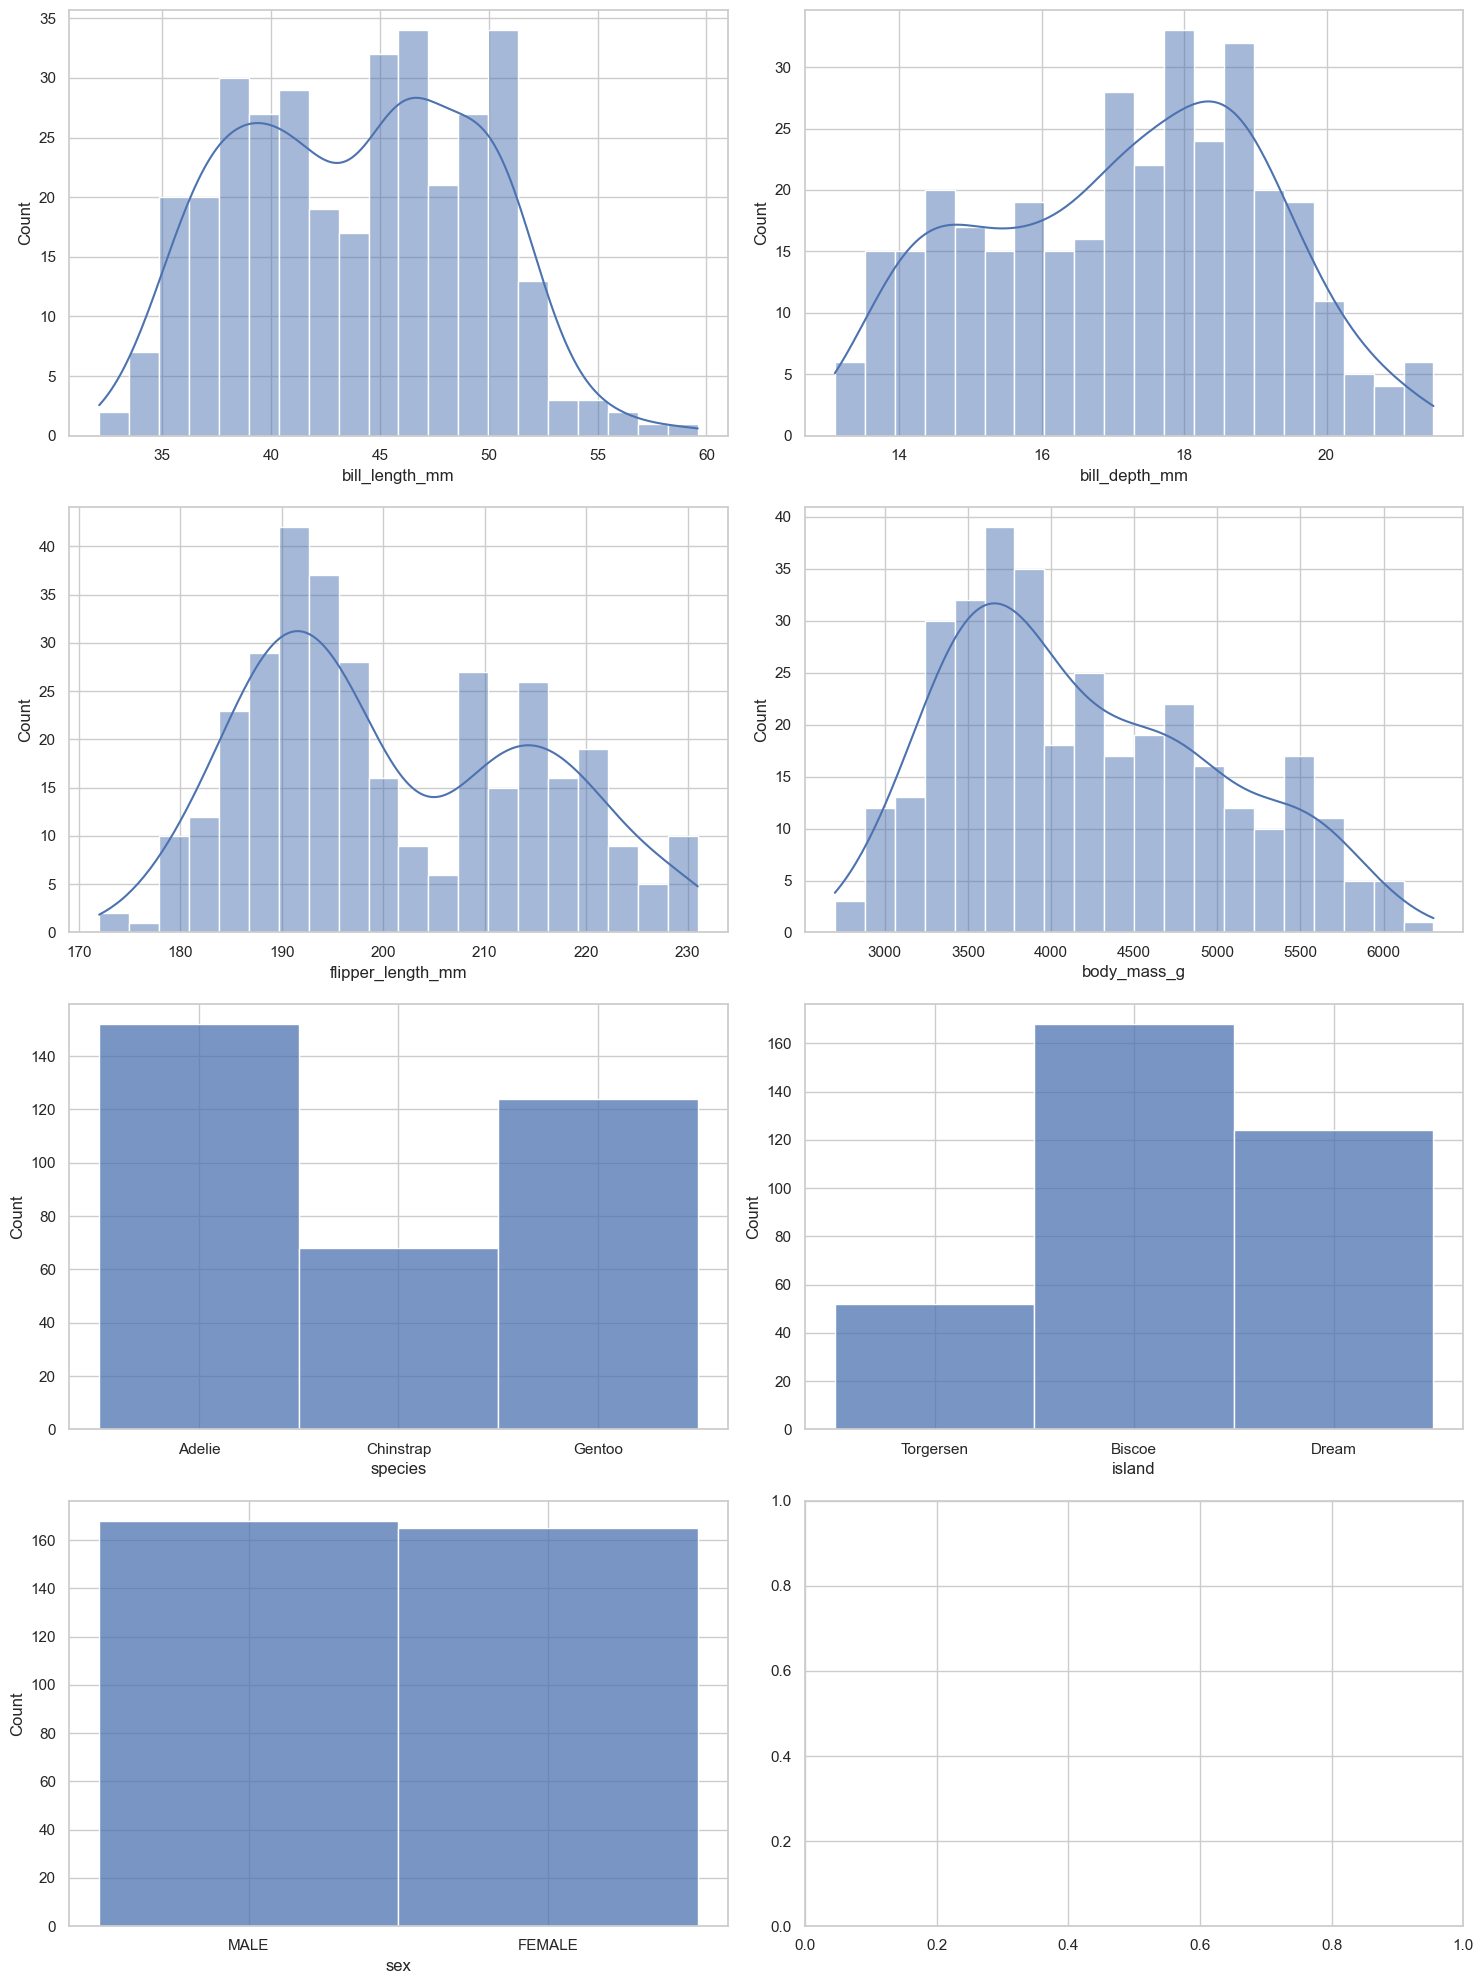

In [40]:
# Import packages for numpy for looking at various distributions. Matplotlib and seaborn for plotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Firstly, plot histograms of all the measured data
penguins_df_measurements = penguins_df.drop(columns=["species", "island", "sex"]).copy()
fig, ax = plt.subplots(nrows = 4, ncols =2, figsize=(15,20))
sns.histplot(penguins_df["bill_length_mm"], ax=ax[0,0], bins=20, kde=True)
sns.histplot(penguins_df["bill_depth_mm"], ax=ax[0,1], bins=20, kde=True)
sns.histplot(penguins_df["flipper_length_mm"], ax=ax[1,0], bins=20, kde=True)
sns.histplot(penguins_df["body_mass_g"], ax=ax[1,1], bins=20, kde=True)
sns.histplot(penguins_df["species"], ax=ax[2,0], bins=20)
sns.histplot(penguins_df["island"], ax=ax[2,1], bins=20)
sns.histplot(penguins_df["sex"], ax=ax[3,0], bins=20)
fig.tight_layout()


The measured data (flipper length, bill length and depth and body mass) appear quite broadly distributed. In some cases, i.e., for flipper length, it appears that there are two distributions centred about 2 medians. It may make sense to look at the measured data based on another variable, i.e., the penguin species. See below the seaborn histograms with kde curves displayed which give more qualitative insight into the underlying distributions of the data.

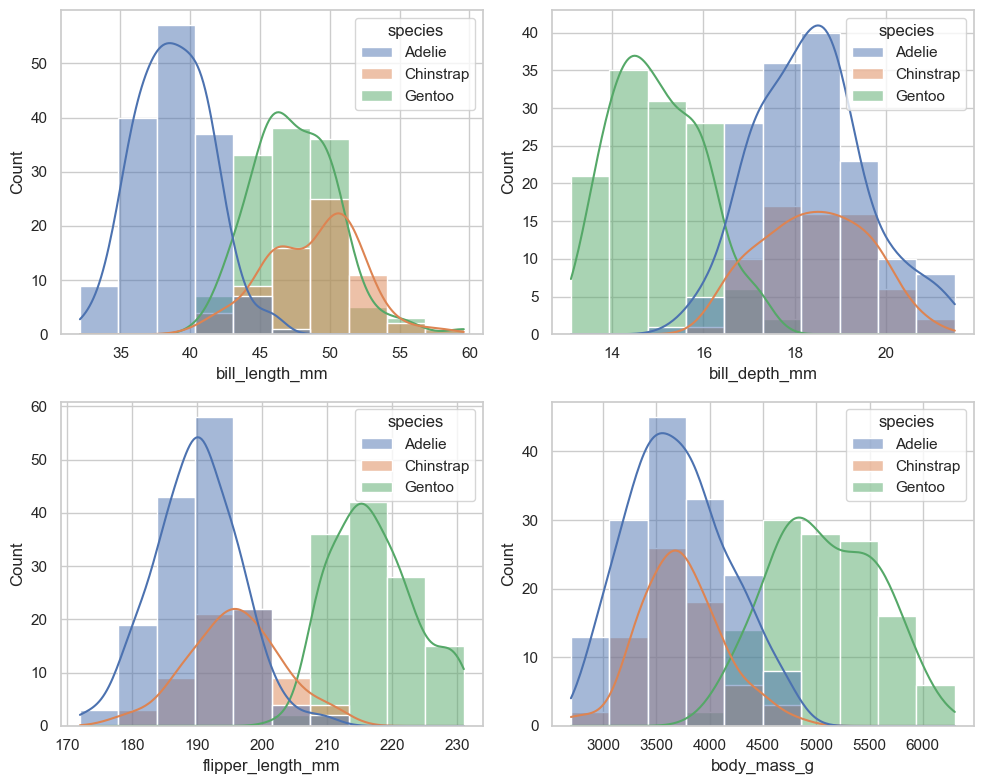

In [46]:
# Plotting histograms of the 4 measured variables based on species
# Using some trial and error to pick the number of bins
no_bins = 10
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(10,8))
sns.histplot(penguins_df, x="bill_length_mm", hue="species", ax=ax[0,0], bins=no_bins, kde=True)
sns.histplot(penguins_df, x="bill_depth_mm", hue="species", ax=ax[0,1], bins=no_bins, kde=True)
sns.histplot(penguins_df, x="flipper_length_mm", hue="species", ax=ax[1,0], bins=no_bins, kde=True)
sns.histplot(penguins_df, x="body_mass_g", hue="species", ax=ax[1,1], bins=no_bins, kde=True)
fig.tight_layout()
plt.show()

***
## Task 4 - Coin Flip <a id="Task4"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>
Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p.


**Solution:**

There are 4 possible outcomes from a 2 coin toss: 
(HH, HT, TH, TT), each scenario has a 0.25 probability (given fair coins)

On number of heads outcomes, there are 3 outcomes; there can be 2 heads, 1 head or 0 heads on any 2 coin toss.

For 2 fair coins flipped together, the probability of the 3 outcomes (0 heads, 1 head, 2 heads) is:

- The probability of 0 heads is 0.25 (0.5*0.5)
- The probability of 1 head is 0.5 (TH and HT have a 0.25 probability each) 
- The probability of 2 heads is 0.25 (0.5*0.5)

The Shannon Entropy equation is defined as follows [https://en.wikipedia.org/wiki/Entropy_(information_theory)]:

$ H(X) := - \sum_{x \in X} p(x) \log p(x) $


In [40]:
# Function to calculate entropy, see also Wikipedia
# p is the probability of flipping a head (p=0.5 for fair coin)

import numpy as np
# function to return Shannon entropy value for number of heads from 2 coin toss where p is the probability of heads for each coin
def H(p):
  # Probability of total of 2 heads (p_2 is 0.25 for 2 fair coins)
  p_2 = p*p
  # Probability of total of 1 head (p_1 is 0.5 for 2 fair coins)
  p_1 = (p*(1-p))*2
  # Probability of total of 0 heads (p_0 is 0.25 for 2 fair coins)
  p_0 = (1-p) * (1-p)
  
  # There are 3 scenarios so Shannon entropy formula will be as follows:
  return -1*(p_0*np.log2(p_0) + p_1*np.log2(p_1) + p_2*np.log2(p_2))
  

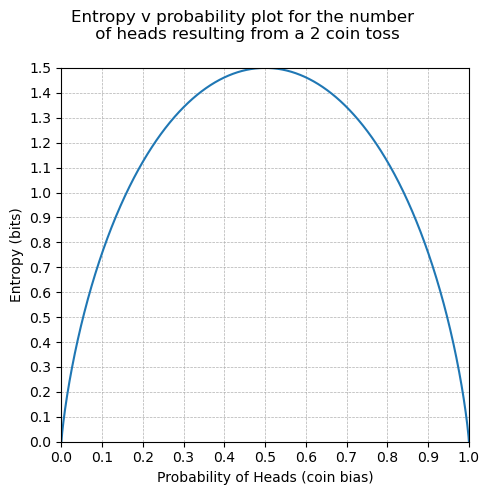

In [70]:
# Set up a numpy array set for range of p (probability of heads for each coin)
p = np.linspace(0.00000001, 0.99999999, 1001)
# Plot entropy v probability
fig, ax = plt.subplots(figsize=(5,5));
fig.suptitle("Entropy v probability plot for the number \n of heads resulting from a 2 coin toss")
ax.plot(p, H(p));
ax.set_xlabel("Probability of Heads (coin bias)");
ax.set_ylabel("Entropy (bits)");
# Plot formatting
ax.grid(linestyle='--', linewidth=0.5)
ax.set_xlim([0,1])
ax.set_ylim([0,1.5])
ytick_spacing = 0.1
ax.yaxis.set_ticks(np.arange(0, 1.6, ytick_spacing));
xtick_spacing = 0.1
ax.xaxis.set_ticks(np.arange(0, 1.1, xtick_spacing));
fig.tight_layout()

***
## Task 5 - Penguins - plots <a id="Task5"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

Create an appropriate individual plot for each of the variables in the penguin data set.


***
End